<a href="https://colab.research.google.com/github/pramsatriapalar/aero_fluid_teaching_materials/blob/main/Normal_shock_wave_calculator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Normal Shock Wave Simple Calculator

###Written by: [Pramudita Satria Palar](https://sites.google.com/view/pramudita-satria-palar/home) (Bandung Institute of Technology, Indonesia)

###Last updated: 21-9-2020

### References: 

*   Anderson Jr, John David. Fundamentals of aerodynamics
*   Anderson Jr, John David. Modern Compressible Flow

**Note: You have to log-in to your gmail account first before you can run all the programs in this notebook.**



Nomenclature:
*   $c_{p}$ = specific heat
*   $p$ = static pressure
*   $p_{0}$ = total pressure
*   $R$ = gas constant
*   $T$ = static temperature
*   $T_{0}$ = total temperature
*   $s$ = entropy
*   $\gamma$ = heat capacity ratio
*   $\rho$ = static density
*   $M_{1}$ = Mach number in front of shock wave
*   $M_{2}$ = Mach number behind the shock wave



This python notebook calculates the flow properties behind the normal shock wave. You need to input the Mach number ahead of the shock wave (i.e., $M_{1}$)  to simultaneously calculate all properties behind the normal shock wave. I won't explain the derivation of all the equations, so make sure that you read excellent textbooks such as **Fundamental of Aerodynamics** by John D. Anderson first.
 
A little bit about the physics first. A flow that passes through a shock wave is characterized by a jump in almost every flow properties, e.g., the static pressure and the static temperature that significantly increase. A flow that passes a normal shock wave is a non-isentropic flow since the inside of a normal shock wave is a highly viscous region. Due to this irreversibility, the total pressure (i.e., $P_{0}$) drops after the flow passes the shock wave. However, notice that the total temperature (i.e., $T_{0}$) does not change across the normal shock wave (adiabatic); this is simply because there is no heat transfer occurs inside a normal shock wave. Notice that I use the subscript 1 and 2 to denote the properties ahead and behind the shock wave, respectively. 
 
 
 
 
The basic objective when studying a normal shock wave is actually simple, that is,
 
*   **Calculate the values of the properties behind the shock wave.**
 
To answer this, the nice thing is that we only need to know $M_{1}$ to know $M_{2}$ and the ratio of all the properties (say, $p_{2}/p_{1}$, $T_{2}/T_{1}$). So if you know, say, $p_{1}$, you can calculate $p_{2}$ simply by knowing $p_{2}/p_{1}$. In the following calculations, the gas is an air ($R=287.5$ J/Kg.K, $\gamma=1.4$), where the $c_{p}$ is calculated by $c_{p} = (\gamma R)/(\gamma-1)$. However, you can change $R$ and $\gamma$ by yourself. The equations that we will use to calculate the ratios and the entropy change are written below:
 
 
*  $\frac{p_{2}}{p_{1}} = 1 + \frac{2\gamma}{\gamma+1}(M_{1}^{2}-1)$

---


*  $\frac{T_{2}}{T_{1}} = \frac{h_{2}}{h_{1}} = \bigg[1 + \frac{2\gamma}{\gamma+1}(M_{1}^{2}-1)\bigg] \frac{2+(\gamma-1)M_{1}^{2}}{(\gamma+1)M_{1}^{2}} $
*  $\frac{\rho_{2}}{\rho_{1}} = \frac{(\gamma+1)M_{1}^{2}}{2+(\gamma-1)M_{1}^{2}}$
*  $s_{2}-s_{1} = c_{p} \text{ ln }(\frac{T_{2}}{T_{1}})-R \text{ ln }(\frac{p_{2}}{p_{1}})$
*  $\frac{p_{0_{2}}}{p_{0_{1}}} = \text{e}^{-(s_{2}-s_{1})/R}$
 
 
---

Before you can run the program, you have to define $\gamma$ (```gamma```) and $R$ (```R```) first (notice that the default $\gamma$ and $R$ written here are for air). **Execute the following cell first**: 



In [ ]:
gamma = 1.4 # Specific heats
R = 287 # Gas constant (air), unit: J/Kg.K

To do all the calculations, **you need to run the following program first**:










In [ ]:
#@title Run this code first! 
import numpy as np
import matplotlib.pyplot as plt 
 
cp = (gamma*R)/(gamma-1) # heat capacity (air), unit: J/Kg.K
 
def property_calc(M1):
    if M1 < 1:
       raise ValueError("M1 should be higher than 1")
    M2 = np.sqrt((1+((gamma-1)/2)*(M1**2)) / (gamma*M1**2 - (gamma-1)/2)) # Mach number behind the shock wave
    p2_to_p1 = 1 + ((2*gamma)/(gamma+1))*(M1**2-1) # Ratio of static pressure
    T2_to_T1 = (p2_to_p1)*((2+(gamma-1)*M1**2)/((gamma+1)*M1**2)) # Ratio of static temperature
    rho2_to_rho1 = ((gamma+1)*M1**2) / (2+(gamma-1)*M1**2) # Ratio of static density
    s2_s1 = cp*np.log(T2_to_T1) - R*np.log(p2_to_p1)
    p02_to_p01 = np.exp(-(s2_s1)/R)
  
    return M2, p2_to_p1, T2_to_T1, rho2_to_rho1, s2_s1, p02_to_p01

Finished? Great. Now you can do the calculation by simply changing ```M1``` below (i.e., your $M_{1}$):

In [ ]:
M1 = 3 # Change this to any Mach number (ahead of the shock wave) that you want

and run the following to calculate the properties behind the normal shock wave
(Notice that the program will return an error if $M_{1}$ is lower than 1!). 

In [ ]:
#@title Run this to calculate the properties behind the normal shock wave!
M2s, p2_to_p1s, T2_to_T1s, rho2_to_rho1s, s2_s1, p02_to_p01 = property_calc(M1)
print("The Mach number ahead of the shock wave is: " , "{:.4f}".format(M1))
print("Your gamma is: " , "{:.4f}".format(gamma))
print("Your gas constant is: " , "{:.4f}".format(R))
print("The mach number behind the shock wave is: " , "{:.4f}".format(M2s))
print("The static pressure ratio is: " , "{:.4f}".format(p2_to_p1s))
print("The static temperature ratio is: " , "{:.4f}".format(T2_to_T1s))
print("The static density ratio is: " , "{:.4f}".format(rho2_to_rho1s))
print("The total pressure ratio is: " , "{:.4f}".format(p02_to_p01))
print("The entropy change is: " , "{:.4f}".format(s2_s1), "J/Kg.K")

The Mach number ahead of the shock wave is:  3.0000
Your gamma is:  1.4000
Your gas constant is:  287.0000
The mach number behind the shock wave is:  0.4752
The static pressure ratio is:  10.3333
The static temperature ratio is:  2.6790
The static density ratio is:  3.8571
The total pressure ratio is:  0.3283
The entropy change is:  319.6301 J/Kg.K


---

# Plotting


Now you want to do more than just calculating a value behind the normal shock wave for a specific $M_{1}$. That is, now you want to create a plot that depicts the trend of the flow properties as a function of $M_{1}$. No worries, please do the following.

The plot starts from $M_{1}=1$, and you have to change the upper bound of your plot (```M1_ub```) to any value that you wish (say, if you want to plot from $M_{1}=1$ to $M_{1}=10$, write ```M1_ub=10```) .  To select the quantity of interest that you want to plot, please change ```QOI``` to 

*   ```'M2'``` for $M_{2}$
*   ```'p_ratio'``` for $P_{2}/P_{1}$ 
*   ```'T_ratio'``` for $T_{2}/T_{1}$
*   ```'rho_ratio'``` for $\rho_{2}/\rho_{1}$  
*   ```'delta_s'``` for $s_{2}-s_{1}$ 
*   ```'p0_ratio'``` for $\frac{p_{0_{2}}}{p_{0_{1}}}$ 



In [ ]:
M1_ub = 30 # Upper bound for the plot
QOI = 'p_ratio' # quantity of interest

Now run the following code:

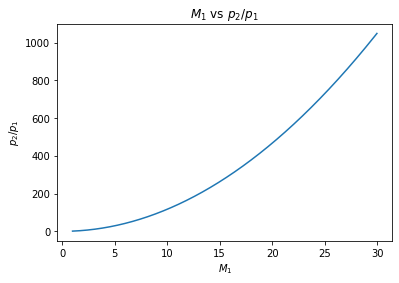

In [ ]:
#@title Run this to create the plot!
M1a = np.arange(1,M1_ub-0.01,0.01)
M2a = np.zeros(len(M1a))
p2_to_p1a = np.zeros(len(M1a))
T2_to_T1a = np.zeros(len(M1a))
rho2_to_rho1a = np.zeros(len(M1a))
s2_s1a = np.zeros(len(M1a))
p02_to_p01a = np.zeros(len(M1a))
 
for i in range(len(M1a)):
    M2a[i] , p2_to_p1a[i], T2_to_T1a[i], rho2_to_rho1a[i], s2_s1a[i], p02_to_p01a[i] = property_calc(M1a[i])
 
QOIdict =   {
  "M2": 0,
  "p_ratio": 1,
  "T_ratio": 2,
  "rho_ratio": 3,
  "delta_s": 4,
  "p0_ratio": 5
}
 
# Plot the figures
ident = QOIdict[QOI]
fig = plt.figure()
ax = plt.axes()
if ident == 0:
    plt.plot(M1a, M2a)
    plt.xlabel("$M_{1}$")
    plt.ylabel("$M_{2}$");
    plt.title("$M_{1}$ vs $M_{2}$")
elif ident == 1:
    plt.plot(M1a, p2_to_p1a)
    plt.xlabel("$M_{1}$")
    plt.ylabel("$p_{2}/p_{1}$");
    plt.title("$M_{1}$ vs $p_{2}/p_{1}$")
elif ident == 2:
    plt.plot(M1a, T2_to_T1a)
    plt.xlabel("$M_{1}$")
    plt.ylabel("$T_{2}/T_{1}$");
    plt.title("$M_{1}$ vs $T_{2}/T_{1}$")
elif ident == 3:
    plt.plot(M1a, rho2_to_rho1a)
    plt.xlabel("$M_{1}$")
    plt.ylabel("$\\rho_{2}/\\rho_{1}$");
    plt.title("$M_{1}$ vs $\\rho_{2}/\\rho_{1}$")
elif ident == 4:
    plt.plot(M1a, s2_s1a)
    plt.xlabel("$M_{1}$")
    plt.ylabel("$s_{2}-s_{1}$ (J/Kg.K)");
    plt.title("$M_{1}$ vs $s_{2}-s_{1}$")  
elif ident == 5:
    plt.plot(M1a, p02_to_p01a)
    plt.xlabel("$M_{1}$")
    plt.ylabel("$p_{0_{2}}/p_{0_{1}}$");
    plt.title("$M_{1}$ vs $p_{0_{2}}/p_{0_{1}}$")

---
That's it! Probably I will add more later. But for now, how about if you try answering the following questions by playing with the plot:

*    **What will happen to the static temperature, static pressure, static density, and total pressure increase or decrease across the normal shock wave? Will they increase or decrease?**
*   **What will happen to the flow properties if $M_{1}$ goes to $\infty$?**

To do the last one, you can set ```M1_ub``` to a very large value and see what will happen! 

Have fun! I have some examples below if you want to put the program into practice.



---
# Examples

**Hint: Use the isentropic flow calculator in the appendix 2 when you need it. You can also use calculator in appendix 1**

The following examples are adopted from **Modern Compressible Flow** by **John D. Anderson (second edition)**



---


**Example 1:** A normal shock wave is standing inside the supersonic inlet of a fighter aircraft. In front on the shock, we have $M_{1}=3$, $p_{1}=0.5$ atm , and $T_{1}=200$K. Please calculate $M_{2}$, $p_{2}$, and $T_{2}$ (across the shock wave).

**Solution:** By using and inputting ```M1 = 3 ``` to the program, we will obtain:

``` The Mach number ahead of the shock wave is:  3.0000
Your gamma is:  1.4000
Your gas constant is:  287.0000
The mach number behind the shock wave is:  0.4752
The static pressure ratio is:  10.3333
The static temperature ratio is:  2.6790
The static density ratio is:  3.8571
The total pressure ratio is:  0.3283
The entropy change is:  319.6301 J/Kg.K
```
Hence


*   $p_{2} = \frac{p_{2}}{p_{1}} p_{1} = 10.3333(0.5) = \boldsymbol{5.165} \text{ atm} $
*   $T_{2} = \frac{T_{2}}{T_{1}} T_{1} = 2.679(200) = \boldsymbol{535.8} \text{ K}$
*   $a_{2} = \sqrt{\gamma R T_{2}} = \sqrt{(1.4)(287)(535.8)} = \boldsymbol{464} \text{ m/s} $
*   $u_{2} = M_{2} a_{2} = (0.4752)(464) = \boldsymbol{220} \text{ m/s}$



---
**Example 2:** A supersonic aircraft is flying at Mach 3 at standard sea level. Calculate the temperature and pressure at the nose of the aircraft.

**Solution** At standard sea level, we have $T_{1}=288.15$ K and $p_{1} =1$ atm. Since the aircraft is flying at Mach 3, a bow shock wave occurs and the streamline through the nose of the aircraft (which is a stagnation point) passed the normal portion of the bow shock wave. Remember that the properties in the stagnation point are total properties, hence, we need to calculate $p_{0_{2}}$ and $T_{0_{2}}$.

First, remember that $T_{0_{1}} = T_{0_{2}}$, so that you need to calculate $T_{0_{1}}$ first. To do just that, call your isentropic flow calculator to obtain $T_{0_{1}}/T_{1} = 2.8$ (for $M_{1}=3$). Subsequently

$T_{0_{2}} = T_{0_{1}} = \frac{T_{0_{1}}}{T_{1}}T_{1} = 2.8(288.15) = 806$ K

How about $p_{0_{2}}$? First, you need to obtain $p_{0_{2}}/p_{0_{1}}$ (from the normal shock calculator) and $p_{0_{1}}/p_{1}$ (from the isentropic flow calculator). You will get $p_{0_{2}}/p_{0_{1}}=0.3283$ and $p_{0_{1}}/p_{1}=36.7327$ Hence

$p_{0_{2}}= \frac{p_{0_{2}}}{p_{0_{1}}} \frac{p_{0_{1}}}{p_{1}} p_{1} = (0.3283) (36.7237)(1) = 12.0563 \text { atm} $



---
# Appendix 1: Calculator cell 
If you are familiar with mathematical operators in Python, you can execute the cell below to do simple calculations. 

``` 
# Examples:
# To perform 3.5+2.5, type '2.5+3.5'
# To perform 3.5-2.5, type '3.5-2.5'
# To multiply 3.5 with 2.5, type '3.5*2.5'
# To divide 3.5 with 2.5, type '3.5/2.5'
```

In [ ]:
2.258/3.6191

0.6239120223259926

---

# Appendix 2: Isentropic Flow Calculator
For your convenience, you can use the isentropic flow calculator below by inputting your Mach number (i.e., ```M_isen```). You will obtain the following ratios:



*   $\frac{T_{0}}{T} = 1 + \frac{\gamma-1}{2}M^{2}$
*  $\frac{p_{0}}{p} = \bigg(1 + \frac{\gamma-1}{2}M^{2}\bigg)^{\frac{\gamma}{\gamma-1}}$
*  $\frac{\rho_{0}}{\rho} = \bigg(1 + \frac{\gamma-1}{2}M^{2}\bigg)^{\frac{1}{\gamma-1}}$

Please input your ```M_isen``` below and don't forget to execute it`:

In [ ]:
M_isen = 0.4752  # Change this to any Mach number that you wish for the isentropic flow calculator

After that, just simply run the program below to obtain $\frac{T_{0}}{T}$, $\frac{p_{0}}{p}$, and $\frac{\rho_{0}}{\rho}$:

In [ ]:
#@title Run the isentropic flow calculator!
def isentropic_calc(M_isen):
  ''' This program calculates the ratio of total to static properties for a 
  given Mach number'''
  T0_to_t = 1+((gamma-1)/2)*M_isen**2
  p0_to_p = (T0_to_t)**(gamma/(gamma-1))
  rho0_to_rho = (T0_to_t)**(1/(gamma-1))
  return T0_to_t, p0_to_p, rho0_to_rho
 
#@title Run this to calculate the properties behind the normal shock wave!
T0_to_t, p0_to_p, rho0_to_rho = isentropic_calc(M_isen)
print("The Mach number is: " , "{:.4f}".format(M_isen))
print("The ratio of the total and static temperature is: " , "{:.4f}".format(T0_to_t))
print("The ratio of the total and static pressure is: " , "{:.4f}".format(p0_to_p))
print("The ratio of the total and static density is: " , "{:.4f}".format(rho0_to_rho))

The Mach number is:  0.4752
The ratio of the total and static temperature is:  1.0452
The ratio of the total and static pressure is:  1.1672
The ratio of the total and static density is:  1.1168
